# Data visualisation with python

Let's import the libraries and datasets we need:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [2]:
path = '../data/eniac/clean/'

import os
path, dirs, files = next(os.walk(path))
        
print(files)

# create empty list 
df_list = []

# append datasets to the list
for file in files: 
    temp_df = pd.read_csv(path + file, sep=',')
    df_list.append(temp_df)

# show results
orders, orderlines, products, brands = df_list[0], df_list[1], df_list[2], df_list[3]

['orders_cl.csv', 'orderlines_cl.csv', 'products_cl.csv', 'brands.csv']


Transform to date format the columns from orders and orderlines:

In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sku     10579 non-null  object 
 1   name    10579 non-null  object 
 2   desc    10572 non-null  object 
 3   price   10157 non-null  float64
dtypes: float64(1), object(3)
memory usage: 330.7+ KB


In [4]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [5]:
products['price'].mean()

663.1246286305671

## Company revenue

First I will need to filter only the orders that have a completed state: 

In [6]:
orders_compl = orders.query('state == "Completed"')

Before we create a visualisation, we always need to prepare our dataframe: 

In [7]:
p_df = (
orders_compl
    # create two new columns in our dataframe; year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df

,year,month,total_paid
0,2017,Apr,486962.21
1,2017,Aug,722055.81
2,2017,Dec,1897507.75
3,2017,Feb,623896.30
4,2017,Jan,1191437.34
5,2017,Jul,1127172.80
6,2017,Jun,690049.94
7,2017,Mar,115937.31
8,2017,May,646147.86
9,2017,Nov,2949487.12


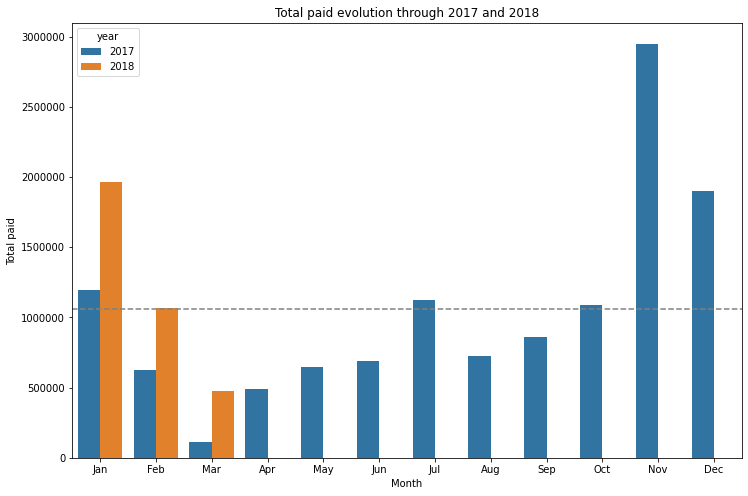

In [8]:
# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define de size of the plot: 12 with be the width, and 8 the height
plt.subplots(figsize=(12, 8))


p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)
# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    p_df['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

plt.xlabel('Month') # x label name
plt.ylabel('Total paid') # y label name
plt.title('Total paid evolution through 2017 and 2018') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

### Revenue distribution by order id

I would like to know more about the different values of `total_paid` for each order by month.

Let's talk more about this concept: 

In [9]:
p_df = (
orders_compl
    # create year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
)
p_df

,order_id,created_date,total_paid,state,check_orders,year,month
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan
...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar


If we create a barplot directly: 

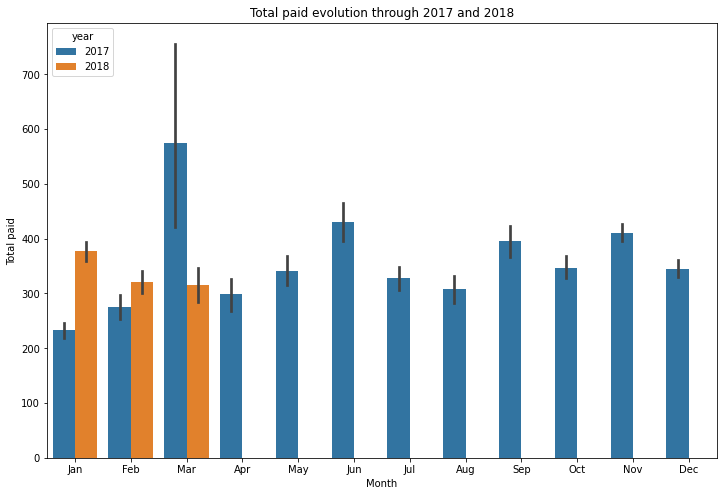

In [10]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplots(figsize=(12, 8))

sns.barplot(data=p_df, x='month', y='total_paid', hue='year', order=months)

plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Look at the description of `?sns.barplot` to undersand more about the chart. What's the meaning of the dark lines on top of each bar?

A better way to see the distribution by month would be to use another type of chart; the boxplot. 

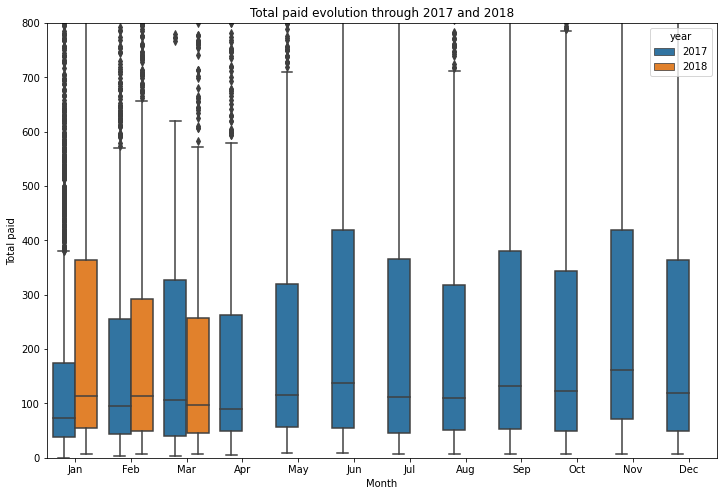

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplots(figsize=(12, 8))

sns.boxplot(data=p_df, x='month', y='total_paid', hue='year', order=months)

plt.ylim(0, 800) # define a limit to put focus on your chart
plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

What I am seeing on this chart? Well, the [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a representaition of the pandas function `.describe()`. It shows the main descriptive statistics of a distribution. 

In [12]:
(
p_df
    # select this 3 columns
    .filter(['year','month','total_paid'])
    # apply the describe function to this two groups
    .groupby(['year','month'])
    .describe()
)

total_paid                                                 
                count   mean     std  min   25%    50%    75%      max
year month                                                            
2017 Apr      1632.00 298.38  614.30 4.99 49.99  89.99 262.98  9423.90
     Aug      2350.00 307.26  599.39 7.78 51.10 109.99 317.23 10586.97
     Dec      5506.00 344.63  585.87 6.98 49.98 119.98 362.97  6657.46
     Feb      2273.00 274.48  520.73 3.99 42.98  94.97 254.98  4163.98
     Jan      5111.00 233.11  522.33 0.00 37.93  72.96 174.98  7230.97
     Jul      3438.00 327.86  602.56 7.48 44.98 110.97 365.99  7216.77
     Jun      1603.00 430.47  752.93 8.89 54.98 137.98 419.98  6698.00
     Mar       202.00 573.95 1208.63 2.82 39.99 106.98 326.74  9987.76
     May      1892.00 341.52  594.72 8.98 56.25 115.00 318.96  5335.00
     Nov      7187.00 410.39  683.62 6.53 71.48 161.23 418.98 13387.78
     Oct      3135.00 346.99  610.90 6.98 49.98 122.24 344.07  6227.77
     Sep      2180.00 395.04  682.26 6.98 52.20 131.78 380.38  7376.58
2018 Feb      3334.00 320.85  587.50 6.98 49.98 113.97 292.98  6034.97
     Jan      5202.00 376.94  665.62 6.48 53.99 112.97 362.99  7268.58
     Mar      1515.00 314.77  633.07 6.98 44.98  96.98 258.04  6656.98

As you can see, most of our transactions have monthly median values around 100, but maximum values go up to 10,000 and the standard deviation is huge. So we have very different types of customers. 

A possible hypothesis is that we have a large group of low-paying customers who are end-users and a small group of 'whale' customers who are companies. What's your hypothesis?

### Revenue: zoom in January

We can zoom into the distribution of one month by filtering one month in our dataset:

In [13]:
p_df_jan = p_df.query('month == "Jan"')

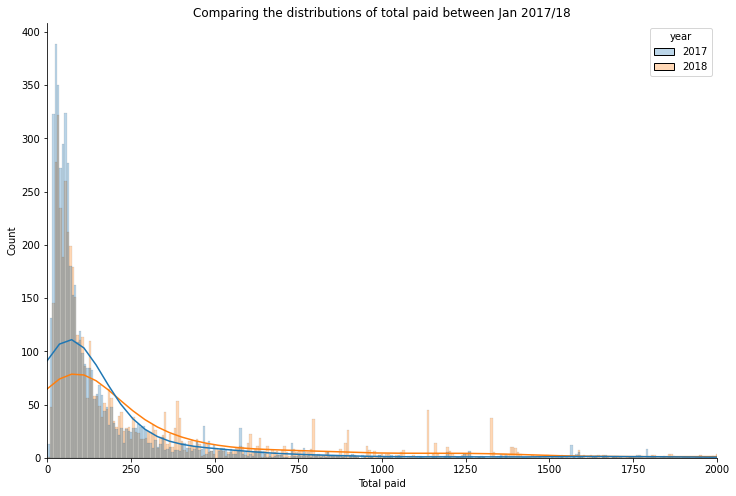

In [14]:
plt.subplots(figsize=(12, 8))

sns.histplot(data=p_df_jan, x='total_paid', hue='year', 
             alpha=.3, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=1000 # define the number of bins the variable total paid will be grouped
            )

plt.xlim(0, 2000)
plt.title('Comparing the distributions of total paid between Jan 2017/18')
plt.xlabel('Total paid')
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.show()

Looking at this distributions, we can see that in 2017 there have been more orders with a `total_paid` smaller than in 2018. While in 2018 we have several spikes between 1000 and 1500, which indicates that there are more orders with a higer price in average. 

Let's check this hypothesis: 

In [15]:
p_df_jan.groupby('year').agg({'total_paid':['mean','median','std']})

total_paid              
           mean median    std
year                         
2017     233.11  72.96 522.33
2018     376.94 112.97 665.62

My theory is confirmed when we aggregate the data. The standard deviation for 2018 also shows us that there is a higher dispersion compared to 2017, caused mainly but these orders around 1250 euros.

Let's see if we can zoom in into the products information for january. 

In [16]:
# we already have the completed orders for January of both year in our p_df_jan, let's it to locate them on the orderlines file
p_sku_jan = (
orderlines
    # filter all the orders id in orderlines for month of january (2017 and 2018)
    .loc[orderlines['id_order'].isin(p_df_jan['order_id'])]
    .assign(year = orders['created_date'].dt.strftime('%Y'))
    .groupby(['year','sku'])
    .agg({'unit_price':'sum'})
    .reset_index()
    .sort_values('unit_price', ascending=False)
    .groupby('year')
    .head(10)
)
p_sku_jan

,year,sku,unit_price
1307,2017,PAC1240,21966.00
844,2017,LGE0044,20341.65
231,2017,APP1810,17399.89
262,2017,APP1940,12564.93
1283,2017,PAC1035,12043.96
236,2017,APP1818,11939.96
250,2017,APP1876,11644.97
1828,2017,WAC0090,10183.36
847,2017,LGE0047,8819.93
1280,2017,PAC0963,8366.97


In [17]:
p_sku_jan = p_sku_jan.merge(products, how='left')
p_sku_jan

,year,sku,unit_price,name,desc,price
0,2017,PAC1240,21966.00,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1899.00
1,2017,LGE0044,20341.65,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",99% Professional Monitor sRGB color calibrator...,599.00
2,2017,APP1810,17399.89,"Apple MacBook Pro 13 ""Core i5 2GHz | 8GB RAM |...",MacBook Pro 13 inch i5 2GHz with 8GB RAM and 2...,1699.00
3,2017,APP1940,12564.93,"Apple MacBook Pro Retina 13 ""i5 27 Ghz | RAM 1...",MacBook Pro 13-inch Retina display 27 Ghz i5 |...,1924.00
4,2017,PAC1035,12043.96,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",IMac desktop computer 27 inch 5K Retina 4GHz i...,3649.00
5,2017,APP1818,11939.96,"Apple MacBook Pro 15 ""Core i7 Touch Bar 27GHz ...",New MacBook Pro 15-inch Touch Bar to 27GHz Cor...,3199.00
6,2017,APP1876,11644.97,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,4039.00
7,2017,WAC0090,10183.36,"Wacom Cintiq 13HD Graphic Tablet 13 ""LED",Graphics Tablet 13-inch LED HD display with 20...,899.99
8,2017,LGE0047,8819.93,"LG 38UC99-W Monitor 38 ""UHD 4K USB 3.0 USB-C",Monitor curved 38 inch IPS 4K ultra high defin...,1299.00
9,2017,PAC0963,8366.97,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",IMac desktop computer 27 inch 5K Retina 4GHz i...,3409.00


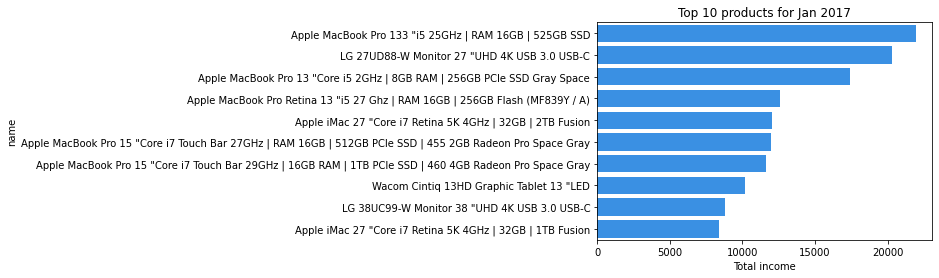

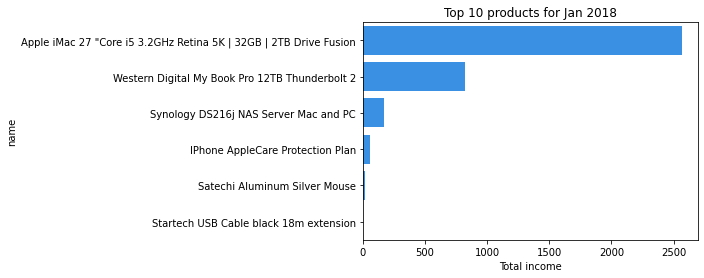

In [18]:
for year in ['2017', '2018']:
    temp = p_sku_jan.loc[p_sku_jan['year'] == year]
    sns.barplot(data=temp, x='unit_price', y='name', color='dodgerblue')
    plt.title('Top 10 products for Jan ' + year)
    plt.xlabel('Total income')
    plt.show()

The [product mix](https://en.wikipedia.org/wiki/Marketing_mix) of the company has changed across the two years. Also the revenue!

Let's do a step back and see if I can find more information about the evolution of mean and median order value across the months:

In [19]:
p_df = (
orders_compl
    .assign(
        # we can create periods of time, in that case year and mont periods. 
        # I recommend you look more in deep and the documentaion of `to_period`
        year_month = orders_compl['created_date'].dt.to_period(freq='M')
    )
    # group by year and month period to find the mean and median value
    .groupby('year_month')
    .agg({'total_paid':['mean','median']})
    .reset_index()
    
)

In [20]:
# rename columns to make it easier to call them on the plot
p_df.columns = ['year_month','mean','median']

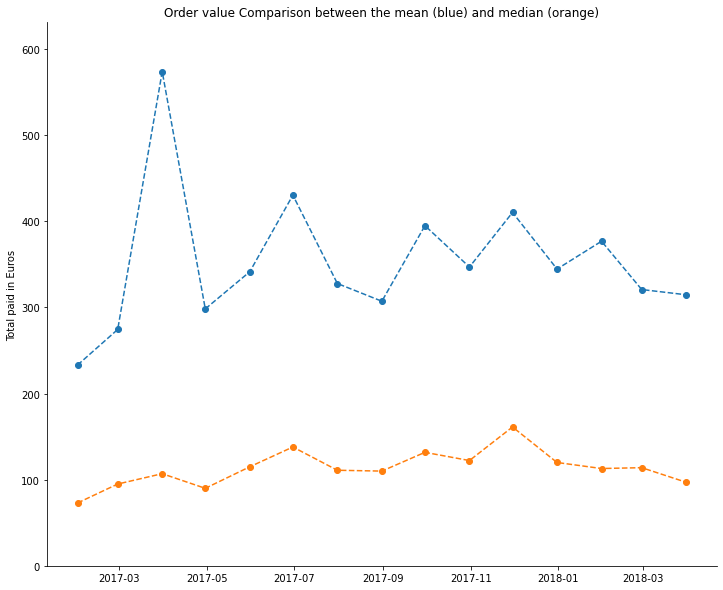

In [21]:
plt.subplots(figsize=(12, 10))

# seaborn and matplotlib works with layers, so you can put one on top of each other.
# using a for look will help us to print as many plots as we want on top of each other
for measure in ['mean','median']: 
    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
    plt.plot_date(data=p_df, x='year_month', y=measure, linestyle='--')

plt.title('Order value Comparison between the mean (blue) and median (orange)')
plt.xlabel('')
plt.ylabel('Total paid in Euros')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, p_df['mean'].max() * 1.1)
sns.despine()
plt.show()

Which are the main conclusions we can extract from this graph? Which is the difference between using the mean and the median?

## Looking for a correlation between shipping cost, total price and quantity of products by each order 

Is there a correlation between the number of products acquired and the shipping cost? 

In [33]:
p_df = (
orderlines
    .groupby(['id_order'])
    .agg({'total_price':'sum', 
         'product_quantity':'sum'})
    .reset_index()
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    # lambda function inside assign help us to call a variable create on the pandas pipeline
    # further explanation below
    .assign(ship_cost = lambda x: x['total_paid'] - x['total_price'])
    # exclude orders with no shippping cost
    .query('ship_cost != 0')
    .groupby('id_order')
    .agg({'ship_cost':'sum',
         'total_price':'sum', 
         'product_quantity':'sum'})
    .sort_values('product_quantity')
)

In [23]:
# Example how to understand a lambda function inside assign

# create a dummy dataframe
temp = pd.DataFrame({
    'x':[1,2,3],
    'y':[2,3,4]
})

# example how it is applied
print('Exemple 1:')
print(
temp
    .assign(x_y = temp['x'] + temp['y'])
    # the only way to call the variable x_y in the same data pipeline is to use 
    # a lambda function, as the variable x_y do not exist on the original dataframe
    .assign(x__x_y = lambda x: x['x'] + x['x_y'])
)

# this process will be exaclty as doing
print('\nExemple 2:')
temp = temp.assign(x_y = temp['x'] + temp['y'])
# in this example I can call the variable as temp['x_y'] as I overwrited the object temp in the line above
print(temp.assign(x__x_y = temp['x'] + temp['x_y']))

Exemple 1:
   x  y  x_y  x__x_y
0  1  2    3       4
1  2  3    5       7
2  3  4    7      10

Exemple 2:
   x  y  x_y  x__x_y
0  1  2    3       4
1  2  3    5       7
2  3  4    7      10


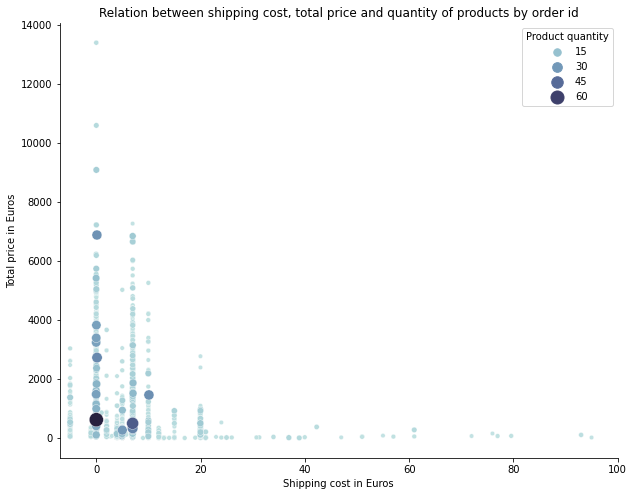

In [24]:
plt.subplots(figsize=(10, 8))

sns.scatterplot(data=p_df, x='ship_cost', y='total_price', 
                hue='product_quantity', 
                size='product_quantity', # define the size of each point based on the variable product quantity
                sizes=(20, 200), # range of size of the size variable
                palette='ch:start=.2,rot=-.3') # define manually the range of colors

plt.xlabel('Shipping cost in Euros')
plt.ylabel('Total price in Euros')
plt.title('Relation between shipping cost, total price and quantity of products by order id')
plt.legend(title = 'Product quantity') # Change the title name of the legend
plt.xlim(-7, 100)
sns.despine()
plt.show()

## CHALLENGE

Answer the following questions with the chart you consider better: 

1. Only a fraction of the total number of orders end up being completed. Let's call this fraction (Completed orders / Total number of orders) 'Orders Conversion Rate'. Can you plot the weekly evolution of the 'Orders Conversion Rate'? Find the best chart to represent it. 

HINT: Trends throughout time are best represented by lines. Search how to do line plots with Seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv("orders_cl.csv")

In [3]:
o = orders
o

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [4]:
o['created_date'] = pd.to_datetime(o['created_date'])

In [5]:
o = o.assign(calendar_week = o['created_date'].dt.strftime('%W'))

In [6]:
o.sort_values('calendar_week')

,order_id,created_date,total_paid,state,calendar_week
671,300044,2017-01-01 22:13:08,0.00,Place Order,00
491,299852,2017-01-01 18:30:05,4467.95,Shopping Basket,00
492,299853,2017-01-01 18:30:20,77.89,Shopping Basket,00
493,299854,2017-01-01 18:31:29,0.00,Place Order,00
494,299855,2017-01-01 18:32:35,28.49,Shopping Basket,00
...,...,...,...,...,...
173002,473380,2017-12-27 13:41:13,387.13,Place Order,52
173001,473379,2017-12-27 13:40:33,186.99,Shopping Basket,52
173000,473378,2017-12-27 13:40:31,1229.89,Shopping Basket,52
172998,473376,2017-12-27 14:05:24,25.68,Completed,52


In [8]:
o= o.assign(year = o['created_date'].dt.strftime('%Y'))
o

,order_id,created_date,total_paid,state,calendar_week,year
0,241319,2017-01-02 13:35:40,44.99,Cancelled,01,2017
1,241423,2017-11-06 13:10:02,136.15,Completed,45,2017
2,242832,2017-12-31 17:40:03,15.76,Completed,52,2017
3,243330,2017-02-16 10:59:38,84.98,Completed,07,2017
4,243784,2017-11-24 13:35:19,157.86,Cancelled,47,2017
...,...,...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order,11,2018
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket,11,2018
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket,11,2018
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket,11,2018


In [13]:
o_2017 =o[o['year'] == '2017']
o_2017

,order_id,created_date,total_paid,state,calendar_week,year
0,241319,2017-01-02 13:35:40,44.99,Cancelled,01,2017
1,241423,2017-11-06 13:10:02,136.15,Completed,45,2017
2,242832,2017-12-31 17:40:03,15.76,Completed,52,2017
3,243330,2017-02-16 10:59:38,84.98,Completed,07,2017
4,243784,2017-11-24 13:35:19,157.86,Cancelled,47,2017
...,...,...,...,...,...,...
177915,478312,2017-12-31 23:53:57,785.08,Cancelled,52,2017
177916,478313,2017-12-31 23:45:41,0.00,Place Order,52,2017
177917,478314,2017-12-31 23:55:02,358.38,Completed,52,2017
177918,478315,2017-12-31 23:57:21,23.98,Pending,52,2017


In [14]:
o_2017.groupby(['state','calendar_week']).order_id.count()

state            calendar_week
Cancelled        00                 17
                 01                174
                 02                113
                 03                107
                 04                 78
                                  ... 
Shopping Basket  48               4717
                 49               3133
                 50               3187
                 51               2386
                 52               3536
Name: order_id, Length: 265, dtype: int64

In [143]:
o_2017.groupby(['calendar_week']).order_id.count()

calendar_week
00      548
01     5019
02     4791
03     3414
04     3508
05     3294
06     2941
07     3228
08     2970
09     2935
10     2100
11     2422
12     2566
13     2644
14     2739
15     1751
16     2457
17     2368
18     2165
19     2160
20     2007
21     2146
22     2315
23     2306
24     2331
25     1999
26     2705
27     3383
28     3269
29     2809
30     3065
31     2655
32     2422
33     1787
34     2153
35     2904
36     2474
37     2511
38     3035
39     2927
40     3187
41     2598
42     3144
43     3482
44     2851
45     3802
46     2577
47    17322
48     8084
49     4601
50     5809
51     5696
52     7318
Name: order_id, dtype: int64

In [160]:
total_week_orders =o_2017.groupby(['calendar_week']).order_id.count()
total_week_orders =total_week_orders.reset_index()
total_week_orders['tot_week_order_id']= total_week_orders['order_id']
total_week_orders=total_week_orders.drop(['order_id'], axis=1)

In [16]:
o_state =o_2017.groupby(['state','calendar_week']).order_id.count()
o_state

state            calendar_week
Cancelled        00                 17
                 01                174
                 02                113
                 03                107
                 04                 78
                                  ... 
Shopping Basket  48               4717
                 49               3133
                 50               3187
                 51               2386
                 52               3536
Name: order_id, Length: 265, dtype: int64

In [149]:
o_state.reset_index().iloc[53:106].head()

,state,calendar_week,order_id
53,Completed,00,114
54,Completed,01,1264
55,Completed,02,1298
56,Completed,03,958
57,Completed,04,1042


In [18]:
o_completed =o_state.reset_index().iloc[53:106]

In [19]:
o_completed['Orders Conversion Rate'] = (o_completed['order_id']/226904)*100 

In [20]:
o_completed['Orders Conversion Rate'] = o_completed['Orders Conversion Rate']*100

In [22]:
o_completed['Orders Conversion Rate']=((o_completed['order_id']/226904)*100).round(decimals=2)

In [163]:
week_o_completed = o_completed.merge(total_week_orders, how='left')

In [168]:
week_o_completed ['Week Orders Conversion Rate']=((week_o_completed['order_id']/week_o_completed['tot_week_order_id'])*100).round(decimals=0)

In [169]:
week_o_completed

,state,calendar_week,order_id,Orders Conversion Rate,tot_week_order_id,Week Orders Conversion Rate
0,Completed,00,114,0.05,548,21.0
1,Completed,01,1264,0.56,5019,25.0
2,Completed,02,1298,0.57,4791,27.0
3,Completed,03,958,0.42,3414,28.0
4,Completed,04,1042,0.46,3508,30.0
5,Completed,05,908,0.40,3294,28.0
6,Completed,06,698,0.31,2941,24.0
7,Completed,07,799,0.35,3228,25.0
8,Completed,08,305,0.13,2970,10.0
9,Completed,09,45,0.02,2935,2.0


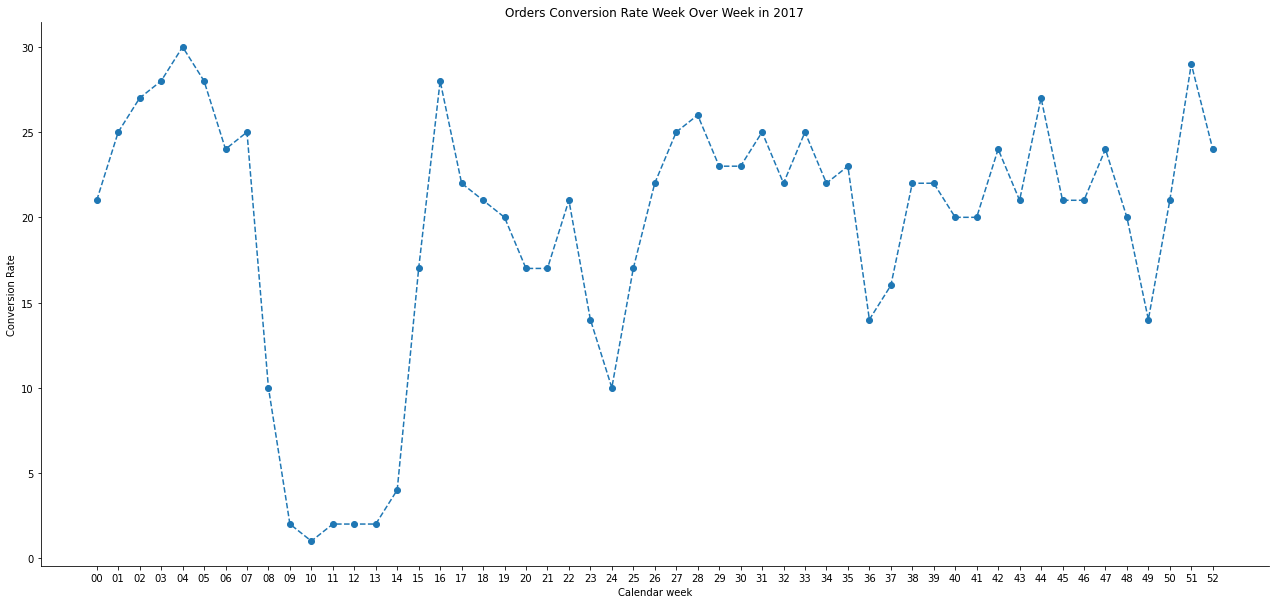

In [171]:
plt.subplots(figsize=(22, 10))
plt.plot_date(data=week_o_completed, x='calendar_week', y='Week Orders Conversion Rate', linestyle='--')

plt.title('Orders Conversion Rate Week Over Week in 2017')
plt.xlabel('Calendar week')
plt.ylabel('Conversion Rate')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
plt.show()

In [138]:
o_completed.head(50)

,state,calendar_week,order_id,Orders Conversion Rate
53,Completed,00,114,0.05
54,Completed,01,1264,0.56
55,Completed,02,1298,0.57
56,Completed,03,958,0.42
57,Completed,04,1042,0.46
58,Completed,05,908,0.40
59,Completed,06,698,0.31
60,Completed,07,799,0.35
61,Completed,08,305,0.13
62,Completed,09,45,0.02


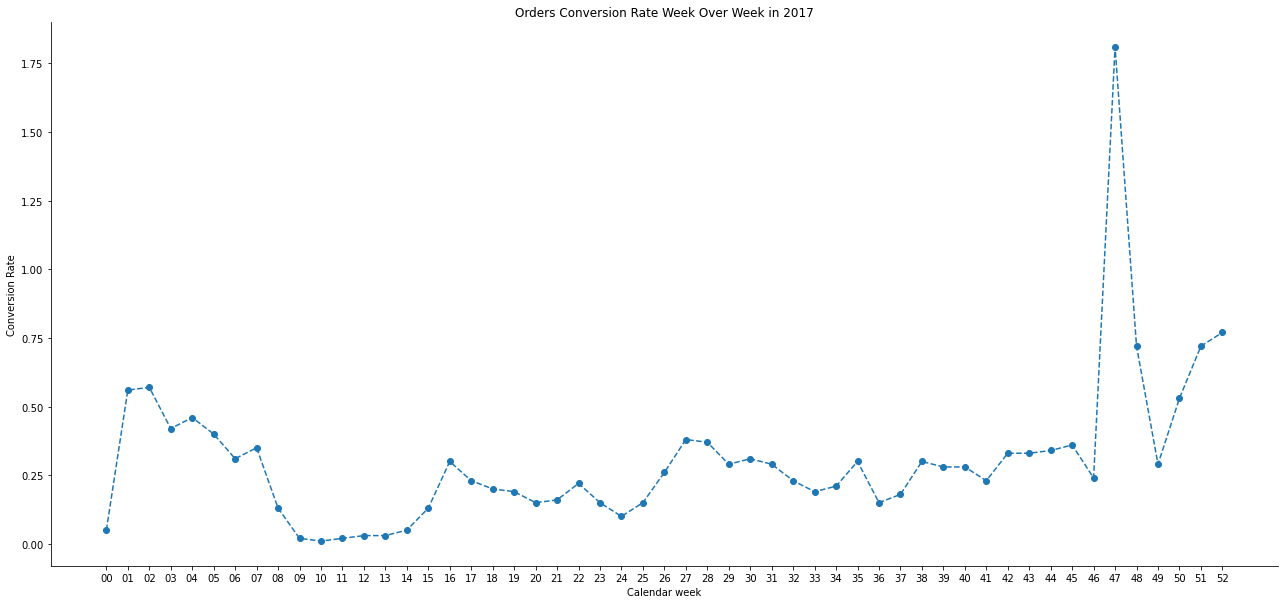

In [24]:
plt.subplots(figsize=(22, 10))
plt.plot_date(data=o_completed, x='calendar_week', y='Orders Conversion Rate', linestyle='--')

plt.title('Orders Conversion Rate Week Over Week in 2017')
plt.xlabel('Calendar week')
plt.ylabel('Conversion Rate')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
plt.show()

If you combine the unit prices from the products dataframe with the unit price in orderlines, you can find if a discount has been applied into a product and how much is the difference. Find out which are the best visualisation to: 



2. Show the top 30 products with the highest discounts in absolute values, on average.  

In [59]:
 p_ol[['name','price','promo_price']]

,name,price,promo_price
0,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,18.99,14.65
1,NewerTech Mini DVI to DVI Adapter,18.99,10.99
2,NewerTech Mini DVI to VGA Adapter,18.99,12.99
3,D-Link GO-SW-8E Switch 8 Ethernet ports,18.99,10.99
4,Lexar Premium SDHC UHS Class 1 | 32GB,18.99,14.28
...,...,...,...
7840078,Wowewa Protector Tempered Glass iPhone 6s Plus...,16.99,15.99
7840079,Griffin Reveal iPhone Case 8/7 Transparent,16.99,6.99
7840080,(Open) Aiino Custodia Elegance iPhone 6 Blue,16.99,7.99
7840081,Open - Wowewa Protector Tempered Glass iPhone ...,16.99,12.01


In [60]:
p_ol_30 = p_ol[['name','price','promo_price']]

In [61]:
(p_ol_30['promo_price']*100)/p_ol_30['price']

0          77.145866
1          57.872565
2          68.404423
3          57.872565
4          75.197472
             ...    
7840078    94.114185
7840079    41.141848
7840080    47.027663
7840081    70.688640
7840082    64.861683
Length: 7840083, dtype: float64

In [62]:
p_ol_30['c_1'] =  (p_ol_30['promo_price']*100)/p_ol_30['price']

<ipython-input-62-dc8c0a99bf74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ol_30['c_1'] =  (p_ol_30['promo_price']*100)/p_ol_30['price']


In [63]:
100-(p_ol_30['c_1']).round(decimals=0)

0          23.0
1          42.0
2          32.0
3          42.0
4          25.0
           ... 
7840078     6.0
7840079    59.0
7840080    53.0
7840081    29.0
7840082    35.0
Name: c_1, Length: 7840083, dtype: float64

In [64]:
p_ol_30['c_1'] =100-(p_ol_30['c_1']).round(decimals=0)

<ipython-input-64-970e26565878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ol_30['c_1'] =100-(p_ol_30['c_1']).round(decimals=0)


In [65]:
p_ol_30['discount'] = p_ol_30['c_1']

<ipython-input-65-0b7e6cfd451b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ol_30['discount'] = p_ol_30['c_1']


In [67]:
p_ol_30=p_ol_30.drop(['c_1'], axis=1)

In [68]:
p_ol_30.duplicated().sum()

7832673

In [70]:
p_ol_30 =p_ol_30.drop_duplicates()

In [73]:
p_ol_30=p_ol_30.sort_values(by='discount',ascending=False).head(30).round(decimals=0)
p_ol_30

,name,price,promo_price,discount
424,(Open) NewerTech Cable HDMI to HDMI 1.4A 180m,18.0,0.0,98.0
5811,Open - OtterBox Symmetry Case iPhone 6 / 6S Bl...,50.0,1.0,98.0
25259,(Open) Jawbone UP2 Activity Monitor Black,120.0,2.0,98.0
3206,Brenthaven Fusion case for MacBook Pro Retina ...,100.0,2.0,98.0
1553,Open - NewerTech Mini DisplayPort to DVI Adapter,30.0,1.0,97.0
8057,Open - (OEM) EarPods Headphones with Remote an...,35.0,1.0,97.0
7343,"Open - OWC Express External box 25 ""USB 3.0 Plata",37.0,1.0,96.0
1620,Open - Griffin Survivor iPhone Case Wallet Cle...,30.0,1.0,96.0
307532,Like new - Apple iPhone 6S 16GB Silver,749.0,33.0,96.0
4476,Cleaning Spray pencil-astuce 6ml,10.0,0.0,96.0


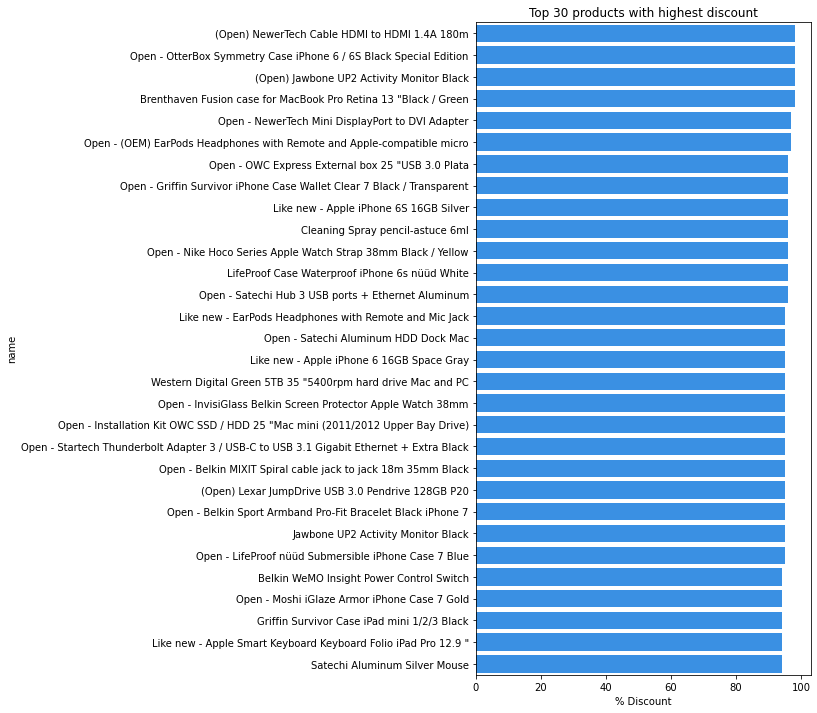

In [74]:
plt.subplots(figsize=(6, 12))
sns.barplot(data=p_ol_30, x='discount', y='name', color='dodgerblue')
plt.title('Top 30 products with highest discount')
plt.xlabel('% Discount')
plt.show()

3. Show the distributions of discounts for each brand. Choose the discount measure you consider better to compare all brands. HINT: you can use the first 3 characters of the sku name to merge it with the brands table.

In [75]:
import pandas as pd

brands = pd.read_csv("brands_cl.csv")
b=brands
print(b)

    short       long
0     8MO  8Mobility
1     ACM       Acme
2     ADN     Adonit
3     AII      Aiino
4     AKI     Akitio
..    ...        ...
182   XOO     Xoopar
183   XRI     X-Rite
184   XTO      Xtorm
185   ZAG   ZaggKeys
186   ZEP       Zepp

[187 rows x 2 columns]


In [76]:
p[['sku','price','promo_price']]

,sku,price,promo_price
0,RAI0007,59.99,49.99
1,APP0023,59.00,59.00
2,APP0025,59.00,56.99
3,APP0072,25.00,23.00
4,KIN0007,34.99,31.99
...,...,...,...
10529,BEL0376,29.99,26.99
10530,THU0060,69.95,64.99
10531,THU0061,69.95,64.99
10532,THU0062,69.95,64.99


In [77]:
p_b = p[['sku','price','promo_price']]

In [78]:
p_b['sku'].str[0:3]

0        RAI
1        APP
2        APP
3        APP
4        KIN
        ... 
10529    BEL
10530    THU
10531    THU
10532    THU
10533    THU
Name: sku, Length: 10534, dtype: object

In [79]:
p_b['sku_short']=p_b['sku'].str[0:3]

<ipython-input-79-e0ccbedc081a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['sku_short']=p_b['sku'].str[0:3]


In [80]:
(p_b['promo_price']*100)/p_b['price']

0         83.330555
1        100.000000
2         96.593220
3         92.000000
4         91.426122
            ...    
10529     89.996666
10530     92.909221
10531     92.909221
10532     92.909221
10533     92.909221
Length: 10534, dtype: float64

In [81]:
p_b['discount'] =  (p_b['promo_price']*100)/p_b['price']

<ipython-input-81-be7bb1577ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['discount'] =  (p_b['promo_price']*100)/p_b['price']


In [83]:
100-(p_b['discount']).round(decimals=0)

0        17.0
1         0.0
2         3.0
3         8.0
4         9.0
         ... 
10529    10.0
10530     7.0
10531     7.0
10532     7.0
10533     7.0
Name: discount, Length: 10534, dtype: float64

In [84]:
p_b['discount']=100-(p_b['discount']).round(decimals=0)

<ipython-input-84-2b9abb8b2579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_b['discount']=100-(p_b['discount']).round(decimals=0)


In [85]:
p_b.groupby('sku_short').discount.mean().reset_index()

,sku_short,discount
0,8MO,51.750000
1,ACM,22.000000
2,ADA,17.000000
3,ADN,22.366667
4,ADO,-2.727273
...,...,...
242,XRI,12.000000
243,XTO,46.666667
244,ZAG,41.225806
245,ZEP,16.000000


In [86]:
p_b = p_b.groupby('sku_short').discount.mean().reset_index()

In [89]:
b=b.assign(check_sku= b.short.isin(p_b.sku_short))

In [90]:
b.query("check_sku==True")

,short,long,check_sku
0,8MO,8Mobility,True
1,ACM,Acme,True
2,ADN,Adonit,True
3,AII,Aiino,True
4,AKI,Akitio,True
...,...,...,...
182,XOO,Xoopar,True
183,XRI,X-Rite,True
184,XTO,Xtorm,True
185,ZAG,ZaggKeys,True


In [91]:
b=b.query("check_sku==True")

In [93]:
b_p =b.merge(p_b, how='left', left_on='short',right_on='sku_short')

In [94]:
b_p.drop(['check_sku','sku_short'], axis=1)

,short,long,discount
0,8MO,8Mobility,51.750000
1,ACM,Acme,22.000000
2,ADN,Adonit,22.366667
3,AII,Aiino,33.562500
4,AKI,Akitio,14.954545
...,...,...,...
178,XOO,Xoopar,43.600000
179,XRI,X-Rite,12.000000
180,XTO,Xtorm,46.666667
181,ZAG,ZaggKeys,41.225806


In [95]:
b_p =b_p.drop(['check_sku','sku_short'], axis=1)

In [97]:
b_p['discount']= b_p['discount'].round(decimals=0)

In [99]:
b_p = b_p.query('discount>=0')

In [100]:
b_p.sort_values(by='discount',ascending=False)

,short,long,discount
111,OPU,Opulus,68.0
123,PQI,Pqi,64.0
18,BTC,Boostcase,62.0
71,KUA,Kukaclip,62.0
92,MOX,Moxie,54.0
...,...,...,...
82,MAK,Maclocks,4.0
69,KIN,Kingston,3.0
73,LAN,LandingZone,3.0
100,NES,Nest,0.0


In [101]:
b_p=b_p.sort_values(by='discount',ascending=False)

In [102]:
b_p

,short,long,discount
111,OPU,Opulus,68.0
123,PQI,Pqi,64.0
18,BTC,Boostcase,62.0
71,KUA,Kukaclip,62.0
92,MOX,Moxie,54.0
...,...,...,...
82,MAK,Maclocks,4.0
69,KIN,Kingston,3.0
73,LAN,LandingZone,3.0
100,NES,Nest,0.0


First solution

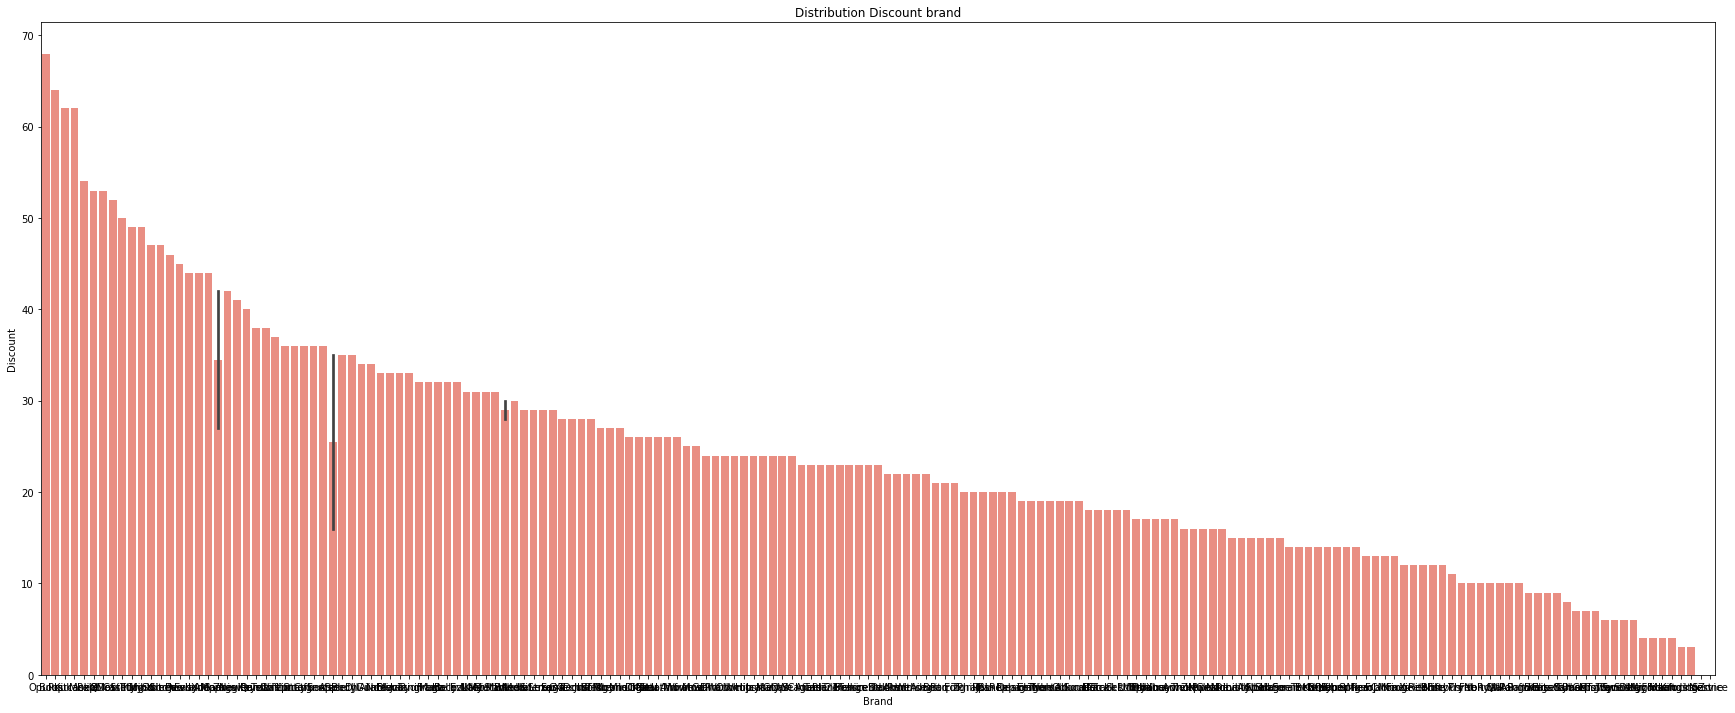

In [103]:
plt.subplots(figsize=(30, 12))

sns.barplot(data=b_p, x='long', y='discount', color='Salmon')
plt.xlabel('Brand')
plt.ylabel('Discount')
plt.title('Distribution Discount brand') 
plt.show() 

In [ ]:
Second solution

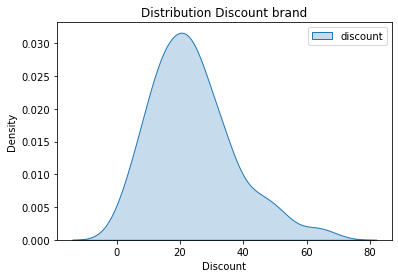

In [104]:
sns.kdeplot(data=b_p, shade=True)
plt.xlabel('Discount')
plt.ylabel('Density')
plt.title('Distribution Discount brand') 
plt.show()

If you combine the unit prices from the products dataframe with the unit price in orderlines, you can find if a discount has been applied into a product and how much is the difference. Find out which are the best visualisation to:

1.Show the evolution of the average discount (in %) by each month

In [108]:
p_ol_one = ol.merge(p, how='left')
p_ol_one 

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,19.99,0.0
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,399.00,0.0
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,569.00,0.0
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,63.99,0.0
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,27.99,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,42.99,1.0
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,141.58,1.0
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,9.99,1.0
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,19.99,0.0


In [109]:
p_ol_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293983 entries, 0 to 293982
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   name              292441 non-null  object        
 8   desc              292441 non-null  object        
 9   price             292441 non-null  float64       
 10  promo_price       292441 non-null  float64       
 11  in_stock          292441 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 29.2+ MB


In [112]:
p_ol_one = p_ol_one.assign(year = p_ol_one['date'].dt.strftime('%Y'))

In [115]:
p_ol_one = p_ol_one.assign(month = p_ol_one['date'].dt.strftime('%b'))

In [117]:
p_ol_one = p_ol_one[p_ol_one['year'] == '2017']

In [118]:
p_ol_one[['price','promo_price','month']]

,price,promo_price,month
0,34.99,19.99,Jan
1,429.00,399.00,Jan
2,699.00,569.00,Jan
3,79.00,63.99,Jan
4,29.90,27.99,Jan
...,...,...,...
219555,44.90,30.99,Dec
219556,1505.59,1399.00,Dec
219557,809.00,793.00,Dec
219558,369.00,362.00,Dec


In [120]:
p_ol_one['c_1'] =  (p_ol_one['promo_price']*100)/p_ol_one['price']

In [127]:
p_ol_one['c_1'] = 100-(p_ol_one['c_1'])


In [132]:
p_ol_one['Discount'] =p_ol_one['c_1']


In [133]:
p_ol_one[['month','Discount']]

,month,Discount
0,Jan,43.0
1,Jan,7.0
2,Jan,19.0
3,Jan,19.0
4,Jan,6.0
...,...,...
219555,Dec,31.0
219556,Dec,7.0
219557,Dec,2.0
219558,Dec,2.0


In [136]:
p_ol_one_discount_month =p_ol_one.groupby('month').Discount.mean().round(decimals=0).reset_index()
p_ol_one_discount_month 

,month,Discount
0,Apr,19.0
1,Aug,21.0
2,Dec,18.0
3,Feb,16.0
4,Jan,20.0
5,Jul,21.0
6,Jun,19.0
7,Mar,17.0
8,May,19.0
9,Nov,17.0


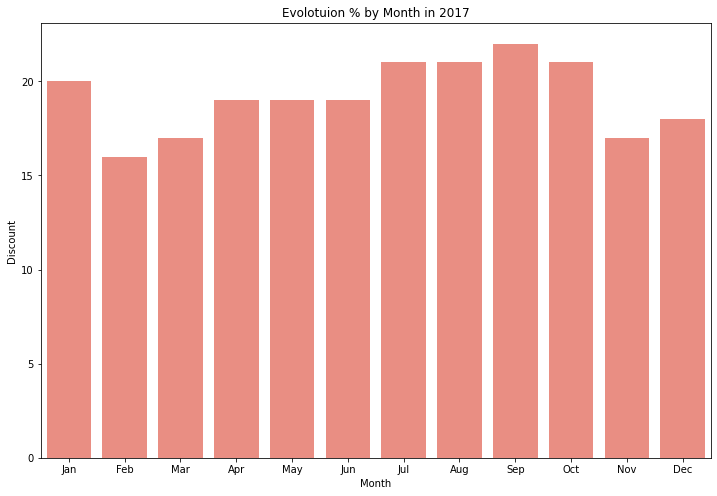

In [137]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplots(figsize=(12, 8))

sns.barplot(data=p_ol_one_discount_month, x='month', y='Discount', order=month, color='Salmon')
plt.xlabel('Month')
plt.ylabel('Discount')
plt.title('Evolotuion % by Month in 2017') 
plt.ticklabel_format(style='plain', axis='y')
plt.show() 